**Sentiment Analysis for COVID-19 Vaccines Tweets**

In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [363]:
data = pd.read_csv('vaccination_all_tweets.csv')

In [364]:
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [365]:
data.shape

(26539, 16)

In [366]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

**is there null data?**

In [367]:
data.isnull().sum()

id                     0
user_name              0
user_location       6162
user_description    1870
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5590
source                12
retweets               0
favorites              0
is_retweet             0
dtype: int64

**clean null data**

In [368]:
data=data.dropna()

In [369]:
data.shape

(15433, 16)

In [370]:
len(data['text'].unique())

15423

**remove duplicates**

In [371]:
data = data.drop_duplicates('text')

In [372]:
data.shape

(15423, 16)

15433-15423=10, so 10 duplicate rows were deleted

### clean text data

In [373]:
def clean_data(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    
    return text

In [374]:
data['text'] = data['text'].apply(clean_data)

### Create funtions to get sentiment

In [375]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [376]:
# apply different colors to different sentiment.
sentiment_color=['#Ecf5ee','#17f746','#F72717']

### 1. filter out tweets about PfizerBioNTech and get it's sentiment

E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

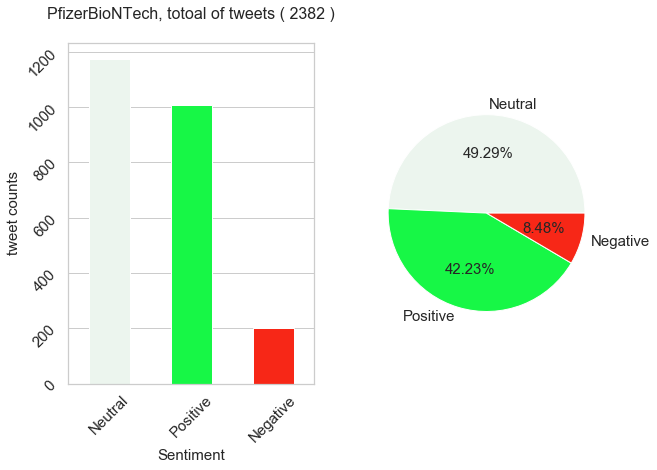

In [388]:
PfizerBioNTech_filter = data['hashtags'].str.contains('PfizerBioNTech')
PfizerBioNTech_data = data[PfizerBioNTech_filter]

PfizerBioNTech_data['polarity'] = PfizerBioNTech_data['text'].apply(get_polarity)
PfizerBioNTech_data['sentiment'] = PfizerBioNTech_data['polarity'].apply(get_sentiment)
PfizerBioNTech_data["company"] = "PfizerBioNTech"

plt.subplot(1, 2, 1)
PfizerBioNTech_data['sentiment'].value_counts().plot.bar(color=sentiment_color);
plt.title(f"PfizerBioNTech, totoal of tweets ( {len(PfizerBioNTech_data)} )\n", fontsize = 16)
plt.xlabel("Sentiment",fontsize=15);
plt.ylabel("tweet counts",fontsize =15);
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, rotation=45)
plt.grid(axis='x')

P_sentiment = PfizerBioNTech_data['sentiment'].value_counts()
P_sentiment_list=list(P_sentiment.index)

plt.subplot(1, 2, 2)
plt.pie(P_sentiment, pctdistance=0.6,labeldistance=1.1,
                 colors=sentiment_color,labels=P_sentiment_list,autopct='%1.2f%%',textprops={'fontsize': 15})

plt.show()

### 2. filter out tweets about Moderna and get it's sentiment

E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

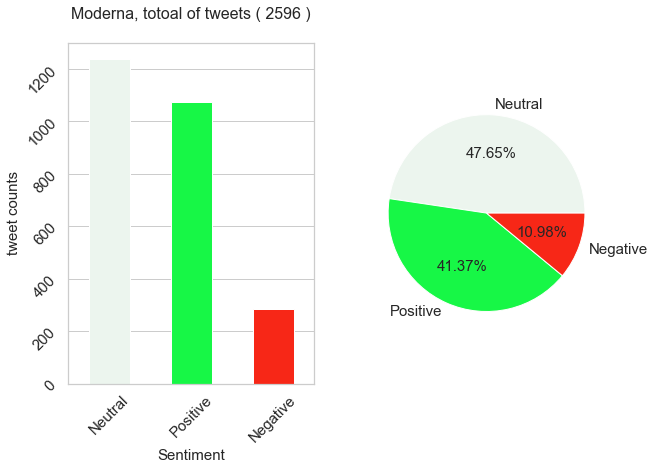

In [378]:
Moderna_filter = data['hashtags'].str.contains('Moderna')
Moderna_data = data[Moderna_filter]

Moderna_data['polarity'] = Moderna_data['text'].apply(get_polarity)
Moderna_data['sentiment'] = Moderna_data['polarity'].apply(get_sentiment)
Moderna_data["company"] = "Moderna"

plt.subplot(1, 2, 1)
Moderna_data['sentiment'].value_counts().plot.bar(color=sentiment_color);
plt.title(f"Moderna, totoal of tweets ( {len(Moderna_data)} )\n", fontsize = 16)
plt.xlabel("Sentiment",fontsize=15);
plt.ylabel("tweet counts",fontsize =15);
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, rotation=45)
plt.grid(axis='x')

M_sentiment = Moderna_data['sentiment'].value_counts()
M_sentiment_list=list(M_sentiment.index)

plt.subplot(1, 2, 2)
plt.pie(M_sentiment, pctdistance=0.6,labeldistance=1.1,
                 colors=sentiment_color,labels=M_sentiment_list,autopct='%1.2f%%',textprops={'fontsize': 15})

plt.show()

### 3. filter out tweets about AstraZeneca and get it's sentiment

E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

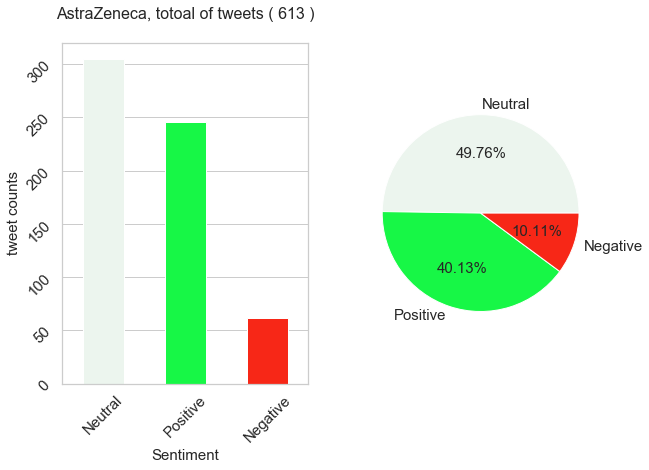

In [379]:
AstraZeneca_filter = data['hashtags'].str.contains('AstraZeneca')
AstraZeneca_data = data[AstraZeneca_filter]

AstraZeneca_data['polarity'] = AstraZeneca_data['text'].apply(get_polarity)
AstraZeneca_data['sentiment'] = AstraZeneca_data['polarity'].apply(get_sentiment)
AstraZeneca_data["company"] = "AstraZeneca"

plt.subplot(1, 2, 1)
AstraZeneca_data['sentiment'].value_counts().plot.bar(color=sentiment_color);
plt.title(f"AstraZeneca, totoal of tweets ( {len(AstraZeneca_data)} )\n",fontsize = 16)
plt.xlabel("Sentiment",fontsize=15);
plt.ylabel("tweet counts",fontsize =15);
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, rotation=45)
plt.grid(axis='x')

A_sentiment = AstraZeneca_data['sentiment'].value_counts()
A_sentiment_list=list(A_sentiment.index)

plt.subplot(1, 2, 2)
plt.pie(A_sentiment, pctdistance=0.6,labeldistance=1.1,
                 colors=sentiment_color,labels=A_sentiment_list,autopct='%1.2f%%',textprops={'fontsize': 15})

plt.show()

### 4. filter out tweets about Sinopharm and get it's sentiment

E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

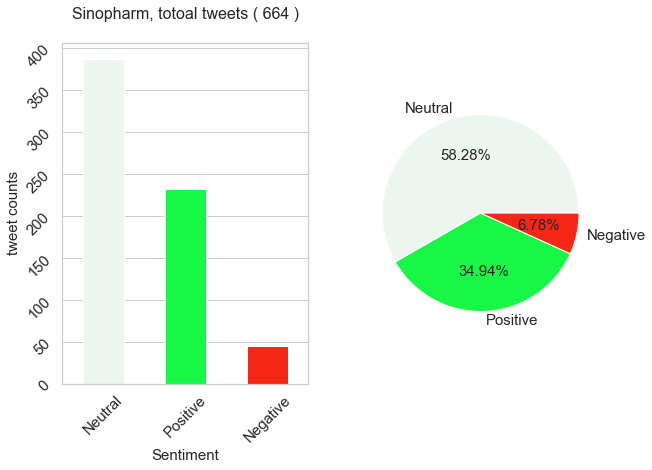

In [380]:
Sinopharm_filter = data['hashtags'].str.contains('Sinopharm')
Sinopharm_data = data[Sinopharm_filter]

Sinopharm_data['polarity'] = Sinopharm_data['text'].apply(get_polarity)
Sinopharm_data['sentiment'] = Sinopharm_data['polarity'].apply(get_sentiment)
Sinopharm_data["company"] = "Sinopharm"

plt.subplot(1, 2, 1)
Sinopharm_data['sentiment'].value_counts().plot.bar(color=sentiment_color);
plt.title(f"Sinopharm, totoal tweets ( {len(Sinopharm_data)} )\n",fontsize=16)
plt.xlabel("Sentiment",fontsize=15);
plt.ylabel("tweet counts",fontsize =15);
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, rotation=45)
plt.grid(axis='x')

S_sentiment = Sinopharm_data['sentiment'].value_counts()
S_sentiment_list=list(S_sentiment.index)

plt.subplot(1, 2, 2)
plt.pie(S_sentiment, pctdistance=0.6,labeldistance=1.1,
                 colors=sentiment_color,labels=S_sentiment_list,autopct='%1.2f%%',textprops={'fontsize': 15})
#plt.legend(title = "Four company:")

plt.show() 

  ### now , put them together for comparison purpose
 

In [381]:
union1 = pd.concat([PfizerBioNTech_data, Moderna_data], ignore_index=True, sort=False)

union2 = pd.concat([AstraZeneca_data,Sinopharm_data], ignore_index=True,sort=False)

combined_data = pd.concat([union1,union2], ignore_index=True,sort=False)

In [384]:
len(combined_data)

6255

### plot all companies and their sentiments together

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

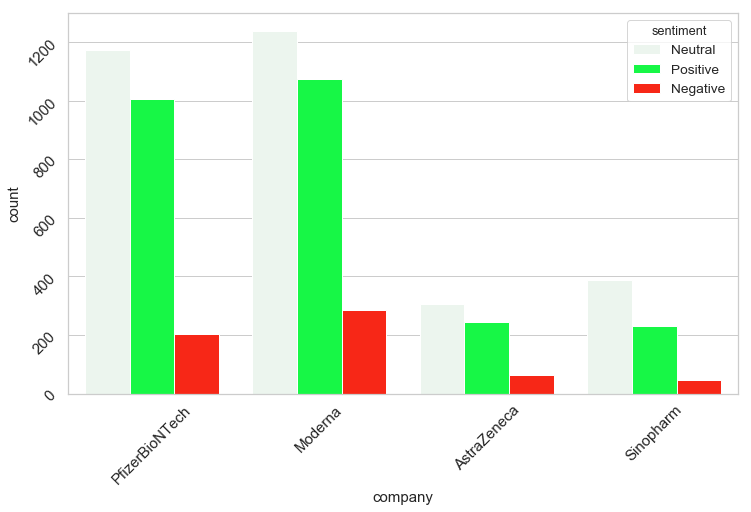

In [385]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
#sns.set(font_scale=1.25)
sns.countplot(x='company',hue='sentiment',data=combined_data,palette=sentiment_color,saturation=9)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, rotation=45)

### show positive review of 4 companies in a pie chart

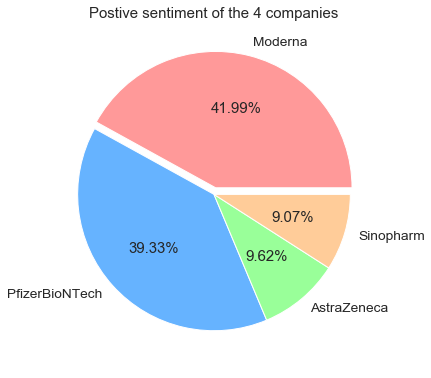

In [398]:
postive_sentiment_filter = combined_data['sentiment'] == "Positive"
postive_review = combined_data[postive_sentiment_filter]

company = postive_review['company'].value_counts()
company_list = list(company.index)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
myexplode = [0.05, 0, 0, 0]
plt.pie(company, pctdistance=0.6,labeldistance=1.1,
                 colors=colors,labels=company_list,autopct='%1.2f%%', explode=myexplode)
plt.title('Postive sentiment of the 4 companies')
plt.show() 

### show % of tweets of the 4 companies

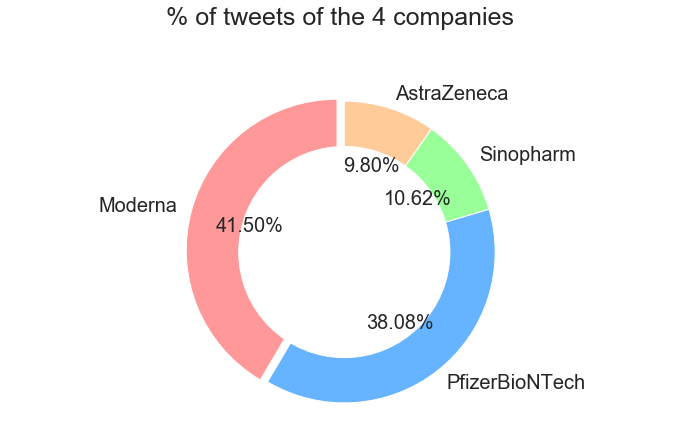

In [387]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
myexplode = [0.05, 0, 0, 0]
fig1, ax1 = plt.subplots()
ax1.pie(company, colors = colors, labels=company_list, autopct='%1.2f%%', startangle=90,explode=myexplode,textprops={'fontsize': 20})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax1.set_title('% of tweets of the 4 companies\n\n',fontsize= 25)
plt.tight_layout()

plt.show()

Findings: Moderna got more tweets than other 3 vaccines, while PfizerBioNTech got biggest portion of positive tweets than 3 others.